# --- ÖĞRENCİ BİLGİLERİ ---

**Adınız:** Muhammed Emin  
**Soyadınız:** Oshan  
**Okul Numaranız:** 2212729007  
**GitHub Repo Bağlantısı:** https://github.com/eminoshan/1.odev-CNN

---

# MODEL 1: TRANSFER LEARNING (VGG16)

Bu notebook'ta, ImageNet verisetinde önceden eğitilmiş VGG16 mimarisi kullanarak **Transfer Learning** ile kendi verisetiniz üzerinde sınıflandırma modeli oluşturacağız. Fine-tuning tekniği ile temel model ağırlıkları donmuş durumda tutulur ve sadece son katmanlar eğitilir.

Dataset Path: ./dataset
Bulunmuş Sınıflar: ['sinif1', 'sinif2']
Found 80 images belonging to 2 classes.


Found 20 images belonging to 2 classes.

Sınıf Sayısı: 2
Sınıf Etiketleri: {'sinif1': 0, 'sinif2': 1}
Eğitim Örneği Sayısı: 80
Doğrulama Örneği Sayısı: 20

Model Özeti:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,610 (64.14 MB)

 Trainable params: 2,097,922 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)


Model Eğitiliyor...
Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.4250 - loss: 2.7197 - val_accuracy: 0.6000 - val_loss: 0.6695
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 965ms/step - accuracy: 0.6875 - loss: 0.7775 - val_accuracy: 0.5000 - val_loss: 1.0268
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 925ms/step - accuracy: 0.9125 - loss: 0.3082 - val_accuracy: 0.5500 - val_loss: 0.9386
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 935ms/step - accuracy: 0.8750 - loss: 0.2828 - val_accuracy: 0.5500 - val_loss: 0.9917
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 931ms/step - accuracy: 0.9125 - loss: 0.2291 - val_accuracy: 0.9000 - val_loss: 0.2946
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 933ms/step - accuracy: 0.9750 - loss: 0.0793 - val_accuracy: 0.8000 - val_loss: 0.3299
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 919ms/step - accuracy: 0.9750 - loss: 0.1288 - val_accuracy: 0.9000 - val_loss: 0.2445
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.9875 - loss: 0.0469 - val_accuracy: 0.9

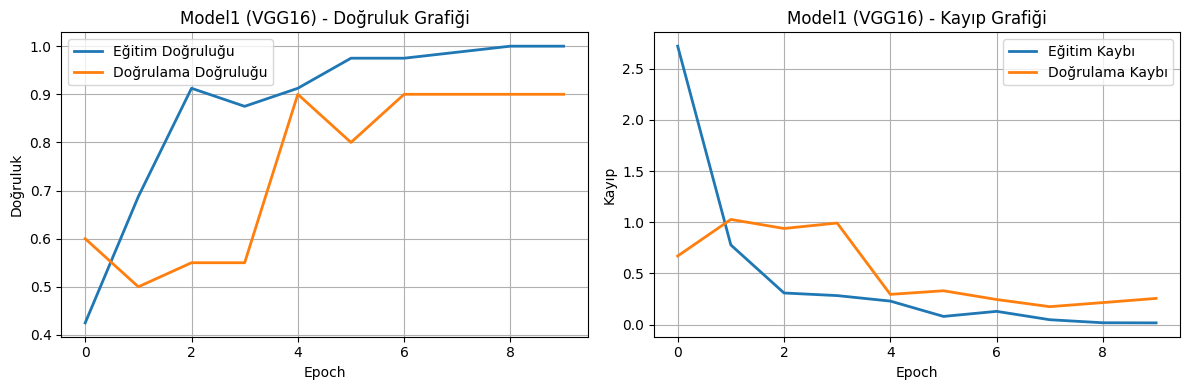


TEST SONUÇLARI
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 971ms/step - accuracy: 0.9000 - loss: 0.2553
Test Kaybı: 0.2553
Test Doğruluğu: 90.00%


In [2]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# 1. AYARLAR
# Yerel makinede çalışmak için path'i ayarla
DATASET_PATH = './dataset'  # Proje klasöründeki dataset

# Eğer dataset klasörü bulunamadıysa kullanıcıya bildir
if not os.path.exists(DATASET_PATH):
    raise FileNotFoundError(f"'{DATASET_PATH}' klasörü bulunamadı. Lütfen dataset klasörünü oluşturun.")

IMG_SIZE = (128, 128)  # Ödev tarafından önerilen boyut
BATCH_SIZE = 32
EPOCHS = 10

print(f"Dataset Path: {DATASET_PATH}")
print(f"Bulunmuş Sınıflar: {os.listdir(DATASET_PATH)}")

# 2. VERİ YÜKLEME (%20 Validation split)
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    DATASET_PATH, 
    target_size=IMG_SIZE, 
    batch_size=BATCH_SIZE,
    class_mode='categorical', 
    subset='training'
)

val_generator = datagen.flow_from_directory(
    DATASET_PATH, 
    target_size=IMG_SIZE, 
    batch_size=BATCH_SIZE,
    class_mode='categorical', 
    subset='validation'
)

print(f"\nSınıf Sayısı: {train_generator.num_classes}")
print(f"Sınıf Etiketleri: {train_generator.class_indices}")
print(f"Eğitim Örneği Sayısı: {train_generator.samples}")
print(f"Doğrulama Örneği Sayısı: {val_generator.samples}")

# 3. TRANSFER LEARNING MODELİ (VGG16 - ImageNet Ağırlıklarıyla)
# VGG16, ImageNet verisetinde eğitilmiş pre-trained ağırlıkları ile yükleniyor
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Fine-tuning: Temel model ağırlıkları donmuş durumda kalır
base_model.trainable = False

# Özel çıktı katmanları ekle
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),  # İç katman
    layers.Dropout(0.5),  # Aşırı uydurmayı azalt
    layers.Dense(train_generator.num_classes, activation='softmax')  # Çıktı katmanı
])

# Model derleme
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

print("\nModel Özeti:")
model.summary()

# 4. EĞİTİM
print("\nModel Eğitiliyor...")
history = model.fit(
    train_generator, 
    epochs=EPOCHS, 
    validation_data=val_generator,
    verbose=1
)

# 5. GRAFİKLER (Doğruluk ve Kayıp)
plt.figure(figsize=(12, 4))

# Doğruluk Grafiği
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.title('Model1 (VGG16) - Doğruluk Grafiği')
plt.legend()
plt.grid(True)

# Kayıp Grafiği
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Eğitim Kaybı', linewidth=2)
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.title('Model1 (VGG16) - Kayıp Grafiği')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 6. TEST SONUÇLARI
print("\n" + "="*50)
print("TEST SONUÇLARI")
print("="*50)
loss, accuracy = model.evaluate(val_generator)
print(f"Test Kaybı: {loss:.4f}")
print(f"Test Doğruluğu: {accuracy*100:.2f}%")
print("="*50)

**Model Yapısı:**
```
VGG16 (ImageNet ağırlıkları) → Flatten → Dense(256) → Dropout(0.5) → Output(num_classes)
```

**Katman Açıklamaları:**
- **Flatten:** 2D görsel özellikleri 1D vektöre çevir
- **Dense(256):** 256 nöronlu tam bağlı katman, ReLU aktivasyonu
- **Dropout(0.5):** Aşırı uydurmayı azaltmak için %50 nöron devre dışı bırak
- **Output:** Softmax ile olasılık dağılımı

---

## Eğitim Parametreleri

- **Optimizer:** Adam (adaptive learning rate)
- **Loss Function:** Categorical Crossentropy (çok sınıflı sınıflandırma)
- **Metric:** Accuracy (doğruluk)
- **Epochs:** 10
- **Batch Size:** 32
- **Validation Split:** %20

## VGG16 Mimarisi

VGG16 (Visual Geometry Group), 16 katmanlı derin bir CNN mimarisidir. ImageNet Challenge 2014'te çok başarılı sonuçlar vermiştir.

**Mimari Özellikleri:**
- 3×3 küçük filtreler kullanır
- Derinlik arttıkça daha karmaşık özellikleri öğrenir
- ImageNet'teki 1000 sınıfı önceden öğrenmiştir
- Kediler, köpekler, arabalar vb. genel özellikleri tanır

**Bizim Yaklaşımımız:**
- ImageNet ağırlıklarını başlangıç ağırlığı olarak kullan
- Temel VGG16 katmanlarını dondur (düşük learning rate yok)
- Üstüne kendi sınıflarımız için yeni katmanlar ekle

---

## Model Mimarisi

## Transfer Learning Nedir?

**Transfer Learning (Aktarmalı Öğrenme):** Başka bir verisetinde (genellikle ImageNet) eğitilmiş önceden yapılmış bir modelin ağırlıklarını kullanarak yeni bir problemi çözmektir. 

### Avantajları:
- Daha hızlı eğitim
- Az veriyle iyi sonuç
- ImageNet'teki genel özellikler kullanılır

### Fine-tuning Stratejisi:
1. **VGG16** modelini ImageNet ağırlıklarıyla yükleyelim
2. Temel model katmanlarını donmuş (non-trainable) bırakalım
3. Kendi verisetimiz için yeni tam bağlı katmanlar ekleyelim
4. Sadece yeni katmanları eğitiyelim

---

## Veri Yükleme ve Preprocessing